In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [2]:
#Loading Dataset fake.csv
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [3]:
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
#loading dataset True.csv
real = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [5]:
real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [6]:
#Assign the label 'fake' to all entries in the fake dataset and 'real' to all entries in the real dataset
fake['label'] = 'fake'  
real['label'] = 'real'

In [7]:
fake.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [8]:
real.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",real
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",real
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",real
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",real
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",real


In [9]:
# Concatenate the fake and real datasets into a single DataFrame, resetting the index
combine = pd.concat([fake,real],ignore_index=True)

In [10]:
# Shuffle the combined dataset randomly and reset the index
combine = combine.sample(frac =1).reset_index(drop = True)

In [11]:
# Save the combined dataset to a CSV file without including the index
combine.to_csv("combine_dataset.cvs",index=False) 

In [13]:
# Load the combined dataset from the CSV file
df = pd.read_csv('/kaggle/working/combine_dataset.cvs')

In [14]:
df.head(10)

,title,text,subject,date,label
0,"Ahead of Trump trip, China urges U.S. not to a...",BEIJING/TAIPEI (Reuters) - China urged the Uni...,worldnews,"October 27, 2017",real
1,KARMA! BIRTHDAY BOY BILL CLINTON HECKLED BY KI...,SO YOUR HUSBAND TURNS 69 If he s Bill Clinton ...,politics,"Aug 21, 2015",fake
2,"MILLIONS IN OUTSIDE MONEY, Hollywood Influence...",Dem. candidate for Georgia congressional seat ...,politics,"Apr 19, 2017",fake
3,BUSTED! LIBERAL BRAINIACS Steal Trump Sign…In ...,This is just idiotic! A couple of liberal brai...,politics,"Sep 24, 2016",fake
4,RADICAL “OCCUPY” MOM WHO LEFT 4 KIDS AND HUSBA...,Occupy Wall Street 2011:The fun is over for a ...,left-news,"Sep 9, 2015",fake
5,"Trump to ask Merkel for advice on Putin, Ukrai...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 10, 2017",real
6,FOX NEWS FREEFALL? BILL O’REILLY Loses Kids Fo...,FOX News has seen their ratings take a nose-di...,left-news,"Mar 1, 2016",fake
7,U.S. senator launches probe into five top opio...,(Reuters) - U.S. Democratic Senator Claire McC...,politicsNews,"March 28, 2017",real
8,Republicans have finalized compromise U.S. tax...,WASHINGTON (Reuters) - The chief tax writer in...,politicsNews,"December 15, 2017",real
9,Trump commutes fraud sentence of kosher meatpa...,"WASHINGTON (Reuters) - President Donald Trump,...",politicsNews,"December 21, 2017",real


In [20]:
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

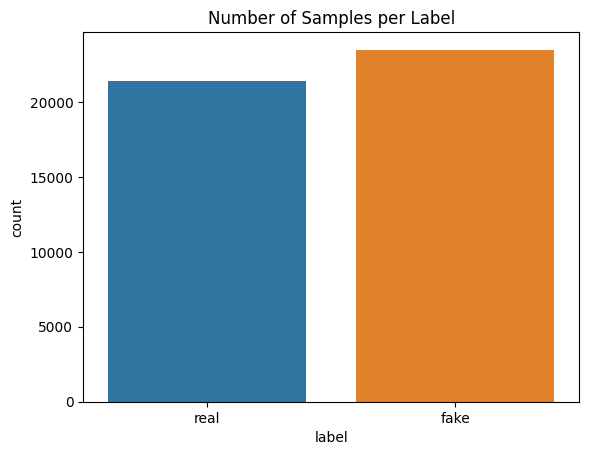

In [16]:
sns.countplot(df,x='label')
plt.title("Number of Samples per Label")
plt.show()

In [17]:
# Display the number of missing values for each column in the DataFrame
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [45]:
df['title'][0]

'Malaysias ruling party unites behind Najib as election looms'

In [28]:
#transformation the 'label' column into numerical values by using LabelEncoder
encoding = LabelEncoder()
df['label'] = encoding.fit_transform(df['label'])

In [29]:
df.head(10)

,title,text,subject,date,label
0,"Ahead of Trump trip, China urges U.S. not to a...",BEIJING/TAIPEI (Reuters) - China urged the Uni...,worldnews,"October 27, 2017",1
1,KARMA! BIRTHDAY BOY BILL CLINTON HECKLED BY KI...,SO YOUR HUSBAND TURNS 69 If he s Bill Clinton ...,politics,"Aug 21, 2015",0
2,"MILLIONS IN OUTSIDE MONEY, Hollywood Influence...",Dem. candidate for Georgia congressional seat ...,politics,"Apr 19, 2017",0
3,BUSTED! LIBERAL BRAINIACS Steal Trump Sign…In ...,This is just idiotic! A couple of liberal brai...,politics,"Sep 24, 2016",0
4,RADICAL “OCCUPY” MOM WHO LEFT 4 KIDS AND HUSBA...,Occupy Wall Street 2011:The fun is over for a ...,left-news,"Sep 9, 2015",0
5,"Trump to ask Merkel for advice on Putin, Ukrai...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 10, 2017",1
6,FOX NEWS FREEFALL? BILL O’REILLY Loses Kids Fo...,FOX News has seen their ratings take a nose-di...,left-news,"Mar 1, 2016",0
7,U.S. senator launches probe into five top opio...,(Reuters) - U.S. Democratic Senator Claire McC...,politicsNews,"March 28, 2017",1
8,Republicans have finalized compromise U.S. tax...,WASHINGTON (Reuters) - The chief tax writer in...,politicsNews,"December 15, 2017",1
9,Trump commutes fraud sentence of kosher meatpa...,"WASHINGTON (Reuters) - President Donald Trump,...",politicsNews,"December 21, 2017",1


In [30]:
# Display the count of each unique value in the 'label' column
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

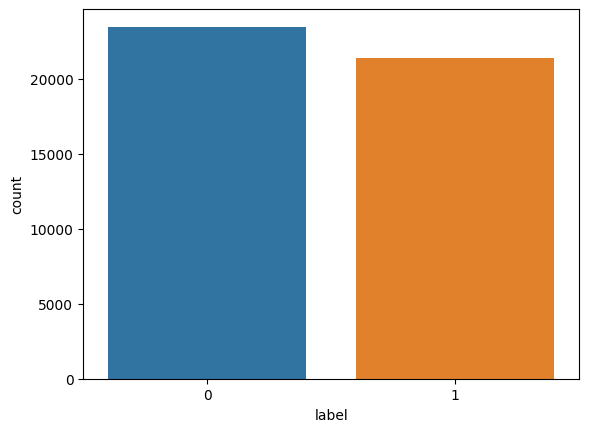

In [31]:
# Create a bar plot of the label counts
sns.countplot(df,x='label')

In [32]:
# Drop the 'subject' and 'date' columns from the DataFrame
df.drop(columns= ['subject','date'],inplace=True,axis=1)

In [33]:
df.columns #number of columns

Index(['title', 'text', 'label'], dtype='object')

In [24]:
# Convert all text in the 'text' column to lowercase
df['text'].str.lower()


0        new york (reuters) - u.s. president barack oba...
1        (reuters) - u.s. president-elect donald trump ...
2        moscow (reuters) - donald trump and vladimir p...
3        when then-president elect donald trump held a ...
4        comey will inevitably be remembered for the co...
                               ...                        
44893    republicans are already predicting doom and gl...
44894    the following statements were posted to the ve...
44895    is barack obama planning to use taxpayer money...
44896    if you think this is a good idea then you migh...
44897    when you get caught cheating, there are very f...
Name: text, Length: 44898, dtype: object

In [25]:
# Convert all title in the 'title' column to lowercase
df['title'].str.lower()

0        u.s., china to step up cooperation on north korea
1        factbox: contenders, picks for key jobs in tru...
2        kissinger calls putin-trump meeting a chance t...
3         trump’s sons plug father’s presidency, hotel ...
4        list of comey’s 10 biggest screw ups as fbi di...
                               ...                        
44893     anonymous gop reps admit clinton will win, bl...
44894    factbox: trump on twitter (july 7) - putin, ge...
44895    the “obama project”…does barack have secret pl...
44896    executive order: obama orders behavioral exper...
44897     s.c. gop rep. beat wife to a bloody pulp in f...
Name: title, Length: 44898, dtype: object

In [34]:
# Remove URLs from the text and title

def removeurl(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r' ',text)

In [35]:
df['text']=df['text'].apply(removeurl)
df['title']=df['title'].apply(removeurl)

In [29]:
# Remove Html from the text and title

def removehtml(text):
    html = re.compile(r'<.*?>')
    return html.sub(r' ',text)
    

In [30]:
df['text']=df['text'].apply(removehtml)
df['title']=df['title'].apply(removehtml)

In [36]:
#Removing Punctuation from text and title
def removepunctuation(text):
    punc = string.punctuation
    return text.translate(str.maketrans('','',punc))

In [37]:
df['text']=df['text'].apply(removepunctuation)
df['title']=df['title'].apply(removepunctuation)

In [33]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Remove stopwords from the text and title
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])

In [36]:
df['text'] = df['text'].apply(remove_stopwords)
df['title'] = df['title'].apply(remove_stopwords)

In [38]:
ps = PorterStemmer()
# Apply stemming to each word in the text and title
def stemming(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [39]:
df['text'] = df['text'].apply(stemming)
df['title'] = df['title'].apply(stemming)

In [40]:
df['text'][4]

'comey inevit rememb controversi role play 2016 presidenti elect agenc conduct surveil trump campaign well investig clinton camp mishandl classifi materi give side argument fbi ultim sway votebut even 2016 campaign fbi endur number humili comey tenur damn revel fbi gener awar almost everi terrorist success struck america last eight years1 bomb boston marathon fbi interview tamerlan tsarnaev let go russia sent obama administr second warn fbi opt investig again2 shortli nsa scandal explod 2013 fbi expos conduct data mine innoc american agenc bloomberg report retain materi decad even wrongdo found3 fbi possess email sent nidal hasan say want kill fellow soldier protect taliban interven lead mani critic argu tragedi result death 31 american fort hood could prevented4 obama administr fbi claim two privat jet use primarili counterterror fact mostli use eric holder robert mueller busi person travel5 fbi demand appl creat backdoor would allow law enforc agenc unlock cell phone variou suspect c

In [41]:
# Combine 'title' and 'text' columns into a new column 'title_text_combine', separated by a hyphen
df['title_text_combine'] = df['title'] + '-' + df['text']

In [42]:
df['title_text_combine'][8]

'former obama spokesliar join nbc paid fake new host…we’v got clip best lie press video-presid obama white hous press secretari spoke liar josh earnest join nbc new polit analystnbc announc addit obama spokesliar lineup memo form nbc new presid noah oppenheim msnbc presid phil griffinw pleas announc josh earnest join nbc new msnbc polit analyst may seen made debut morn today morn joejosh recent complet tenyear run presid obama recent serv white hous press secretari 20142017josh join obama presidenti campaign march 2007 iowa commun director went serv deputi commun director 2008 gener elect josh also work numer nation statewid local campaign cours twenti year politicsa nativ kansa citi josh graduat rice univers degre polit scienc polici studieswith wealth experi insight josh great addit roster contributor asset two network continu cover white hous congress polit beyond beltwaypleas join us welcom joshnoah philher obama spokesliar josh earnest lie time obama clearli identifi isi JV team w

In [43]:
# Define feature column 'X' as 'title_text_combine' and target column 'y' as 'label'
X = df['title_text_combine']
y = df['label']

In [44]:
# Apply TF-IDF vectorization to the 'title_text_combine' feature
# TF-IDF helps convert text data into numerical vectors, 
# reflecting the importance of words in the text relative to the entire corpus
tf = TfidfVectorizer()
X = tf.fit_transform(X)


In [46]:
# Split the data into training and testing sets with 25% of the data reserved for testing
#
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [47]:
X_train.shape

(33673, 201624)

In [48]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5355879 stored elements and shape (33673, 201624)>

In [47]:
y_train.shape

(33673,)

In [49]:
# Initialize  Logistic Regression model
lr = LogisticRegression()

In [50]:
# Train the Logistic Regression model on the training data
lr.fit(X_train,y_train)

LogisticRegression()

In [51]:
# Predict labels for the training data
train_predict = lr.predict(X_train)
# Calculate and print the accuracy of the model on the training data
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for LogisticRegression is", train_accuracy,"%")

Train accuracy for LogisticRegression is 99.29617200724617 %


In [52]:
#Predict labels for the test data
test_predict = lr.predict(X_test)
# Calculate and print the accuracy of the model on the test data
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for LogisticRegression is", test_accuracy,"%")

Test accuracy for LogisticRegression is 99.02004454342985 %


In [53]:
# Print the classification report for the test data predictions
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5885
           1       0.99      0.99      0.99      5340

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [54]:
# Initialize  RandomForestClassifier model
rf = RandomForestClassifier()

In [55]:
# Train the RandomForestClassifier model on the training data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
# Predict labels for the training data
train_predict = rf.predict(X_train)
# Calculate and print the accuracy of the model on the training data
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for RandomForestClassifier is", train_accuracy,"%")

Train accuracy for RandomForestClassifier is 100.0 %


In [57]:
# Predict labels for the testing data
test_predict = rf.predict(X_test)
# Calculate and print the accuracy of the model on the testing data
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for RandomForestClassifier is", test_accuracy,"%")

Test accuracy for RandomForestClassifier is 99.10022271714922 %


In [58]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5885
           1       0.99      0.99      0.99      5340

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [59]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [60]:
train_predict = gb.predict(X_train)
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for GradientBoostingClassifier is", train_accuracy,"%")

Train accuracy for GradientBoostingClassifier is 99.66441956463635 %


In [61]:
test_predict = gb.predict(X_test)
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for GradientBoostingClassifier is", test_accuracy,"%")

Test accuracy for GradientBoostingClassifier is 99.44766146993318 %


In [62]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5885
           1       0.99      1.00      0.99      5340

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [63]:
# Initialize a VotingClassifier with Logistic Regression, Random Forest, and Gradient Boosting as estimators
# Using 'soft' voting to average the predicted probabilities for the final classification
voting_model = VotingClassifier(estimators =[('lr',lr),('rf',rf),('gb',gb)], voting = "soft")

In [64]:
# Train the VotingClassifier model on the training data
voting_model.fit(X_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [67]:
# Predict labels for the training data using the VotingClassifier
train_predict = voting_model.predict(X_train)
# Calculate and print the accuracy of the VotingClassifier on the training data
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for VotingClassifier is", train_accuracy,"%")

Train accuracy for VotingClassifier is 99.95545392450926 %


In [65]:
# Predict labels for the testing data using the VotingClassifier
test_predict = voting_model.predict(X_test)
# Calculate and print the accuracy of the VotingClassifier on the testing data
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for VotingClassifier is", test_accuracy,"%")

Test accuracy for VotingClassifier is 99.73273942093542 %


In [68]:
# Print the classification report for the test data predictions
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5885
           1       1.00      1.00      1.00      5340

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

